# Online Retail Customer Churn Prediction 

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding dataset

In [2]:
file_path = r"E:\Projects\Churn prediction\online_retail_customer_churn.csv"
data = pd.read_csv(file_path, index_col = False)
data

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [5]:
df.tail()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True
999,1000,34,Other,134.86,3956.71,15,48,420.91,6,0,1,269,True,Ignored,True


In [6]:
df.shape

(1000, 15)

In [7]:
df.info

<bound method DataFrame.info of      Customer_ID  Age  Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0              1   62   Other          45.15      5892.58                  5   
1              2   65    Male          79.51      9025.47                 13   
2              3   18    Male          29.19       618.83                 13   
3              4   21   Other          79.63      9110.30                  3   
4              5   21   Other          77.66      5390.88                 15   
..           ...  ...     ...            ...          ...                ...   
995          996   54    Male         143.72      1089.09                  2   
996          997   19    Male         164.19      3700.24                  9   
997          998   47  Female         113.31       705.85                 17   
998          999   23    Male          72.98      3891.60                  7   
999         1000   34   Other         134.86      3956.71                 15   

     Nu

In [8]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

## Data cleaning

In [9]:
# finding missing values
df.isna().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Datatypes

In [11]:
df.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

## Descriptive Statistics

In [12]:
numerical_columns = ['Age','Annual_Income','Total_Spend','Years_as_Customer','Num_of_Purchases','Average_Transaction_Amount','Num_of_Returns','Num_of_Support_Contacts','Satisfaction_Score','Last_Purchase_Days_Ago']

In [13]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


### Skewness

In [14]:
df[numerical_columns].skew()

Age                           0.013168
Annual_Income                -0.044687
Total_Spend                   0.017604
Years_as_Customer             0.067083
Num_of_Purchases              0.060150
Average_Transaction_Amount   -0.097007
Num_of_Returns               -0.056576
Num_of_Support_Contacts       0.082670
Satisfaction_Score            0.004082
Last_Purchase_Days_Ago        0.023327
dtype: float64

### Kurtosis

In [15]:
df[numerical_columns].kurt()

Age                          -1.212970
Annual_Income                -1.228979
Total_Spend                  -1.207383
Years_as_Customer            -1.191698
Num_of_Purchases             -1.216627
Average_Transaction_Amount   -1.274298
Num_of_Returns               -1.227017
Num_of_Support_Contacts      -1.277017
Satisfaction_Score           -1.251670
Last_Purchase_Days_Ago       -1.174978
dtype: float64

####  The kurtosis is negative (Platykurtic distribution). It indicates that there are fewer extreme values than normal distribution.

## Exploratory Data Analysis(EDA)

### Univariate Analysis

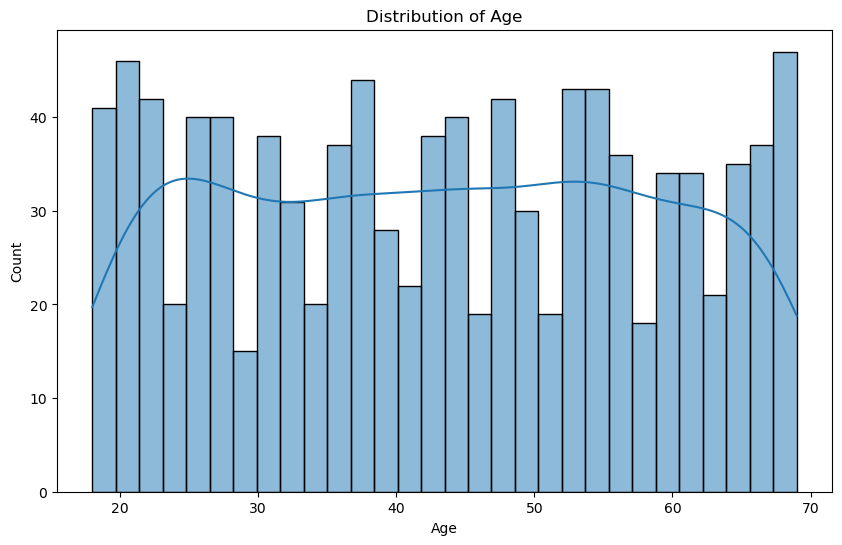

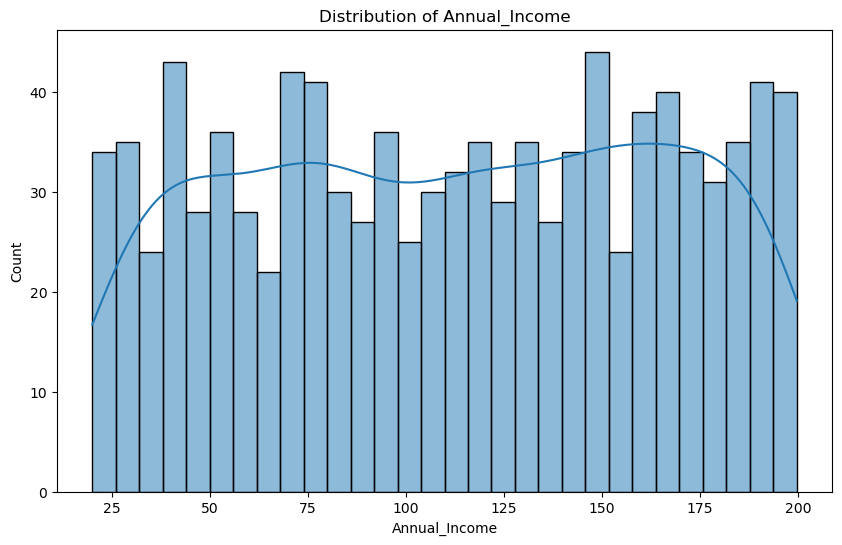

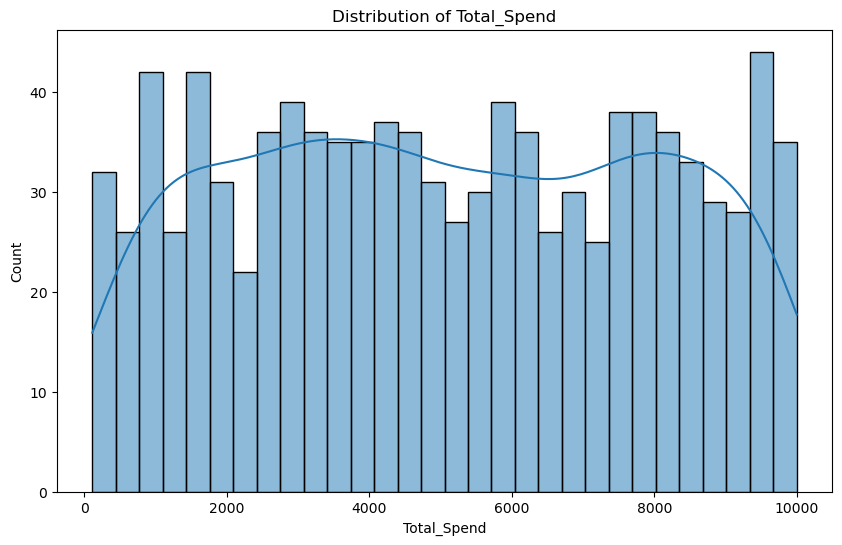

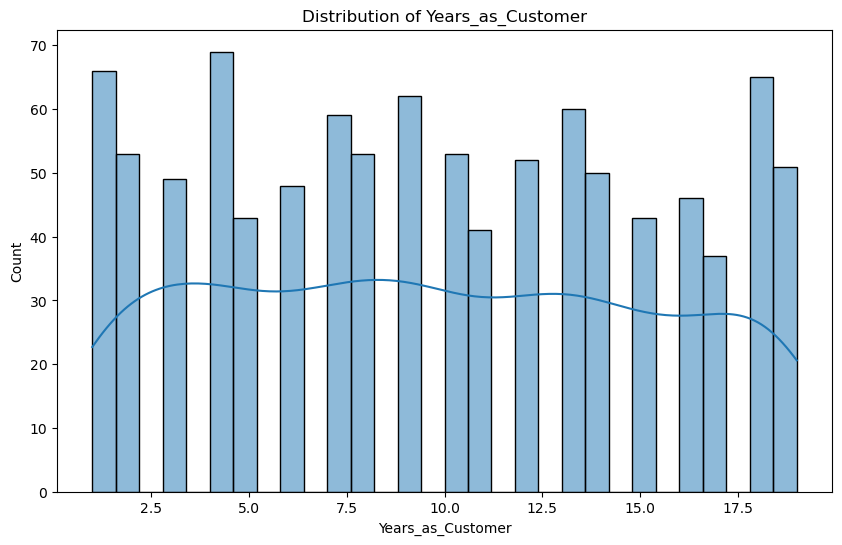

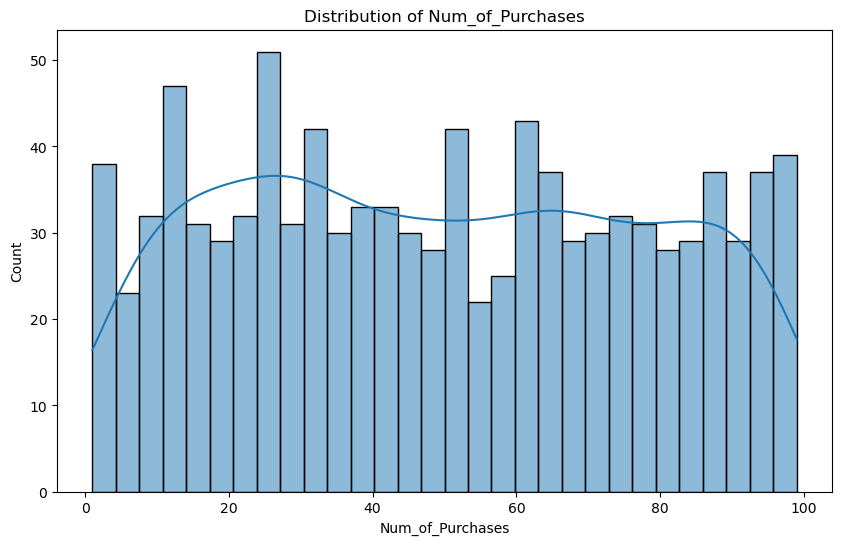

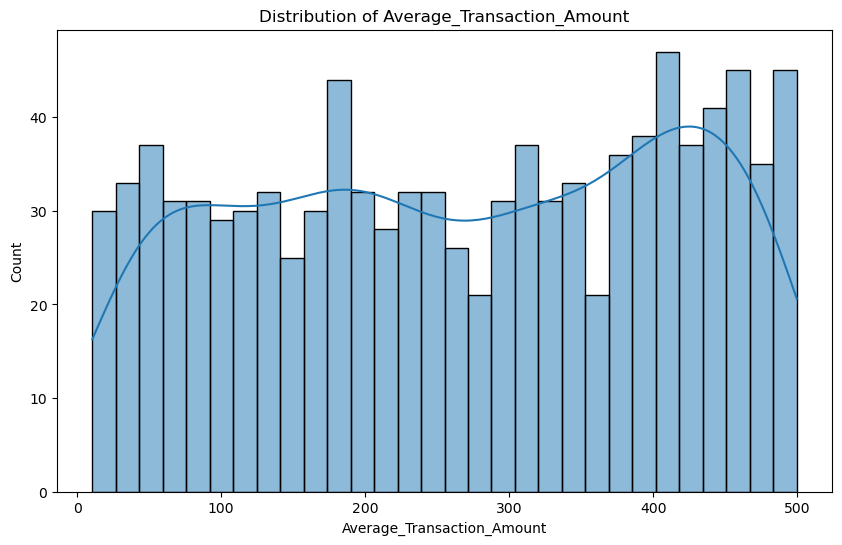

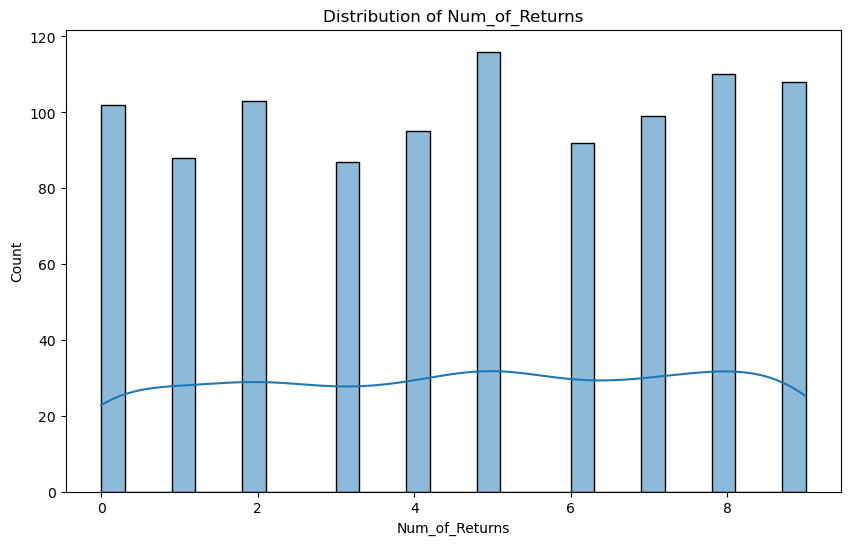

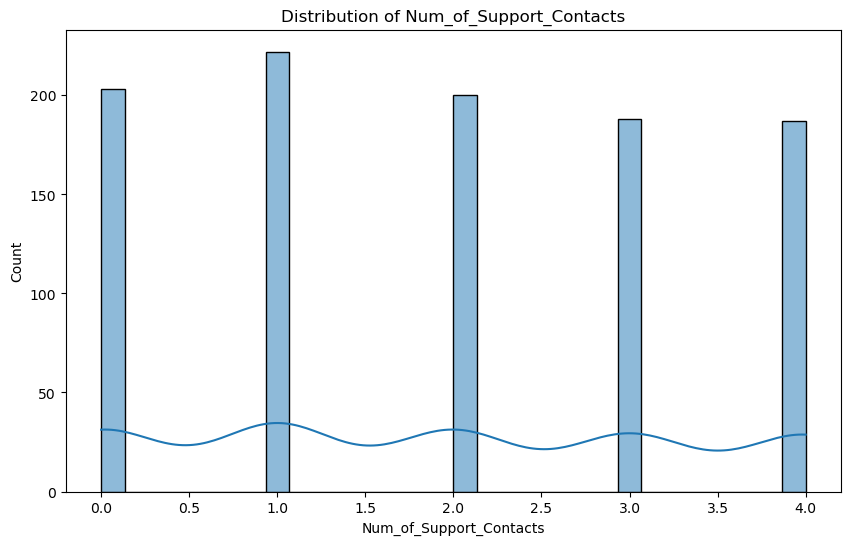

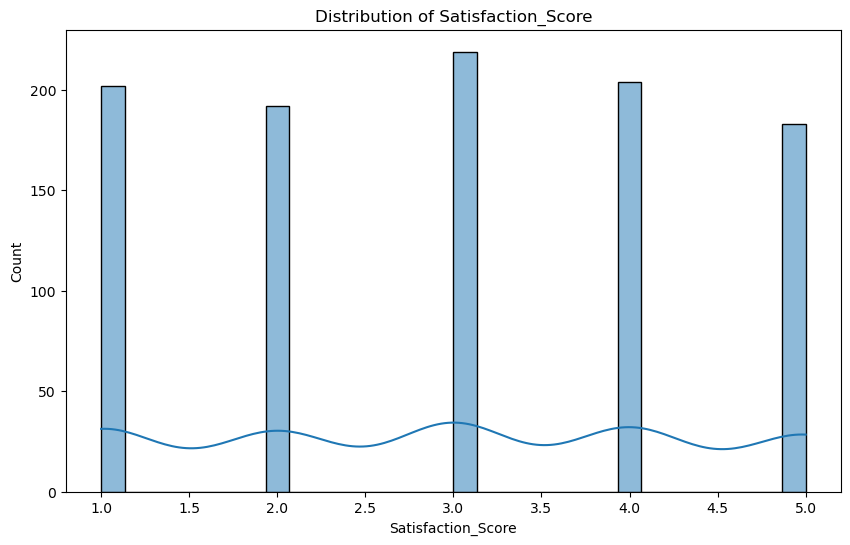

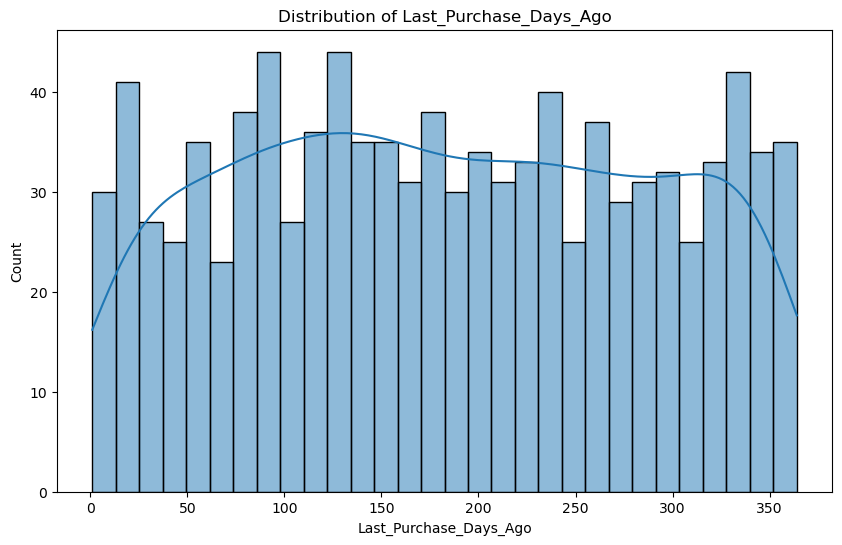

In [16]:
# Histograms for numerical columns

for col in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Bivariate Analysis

E:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


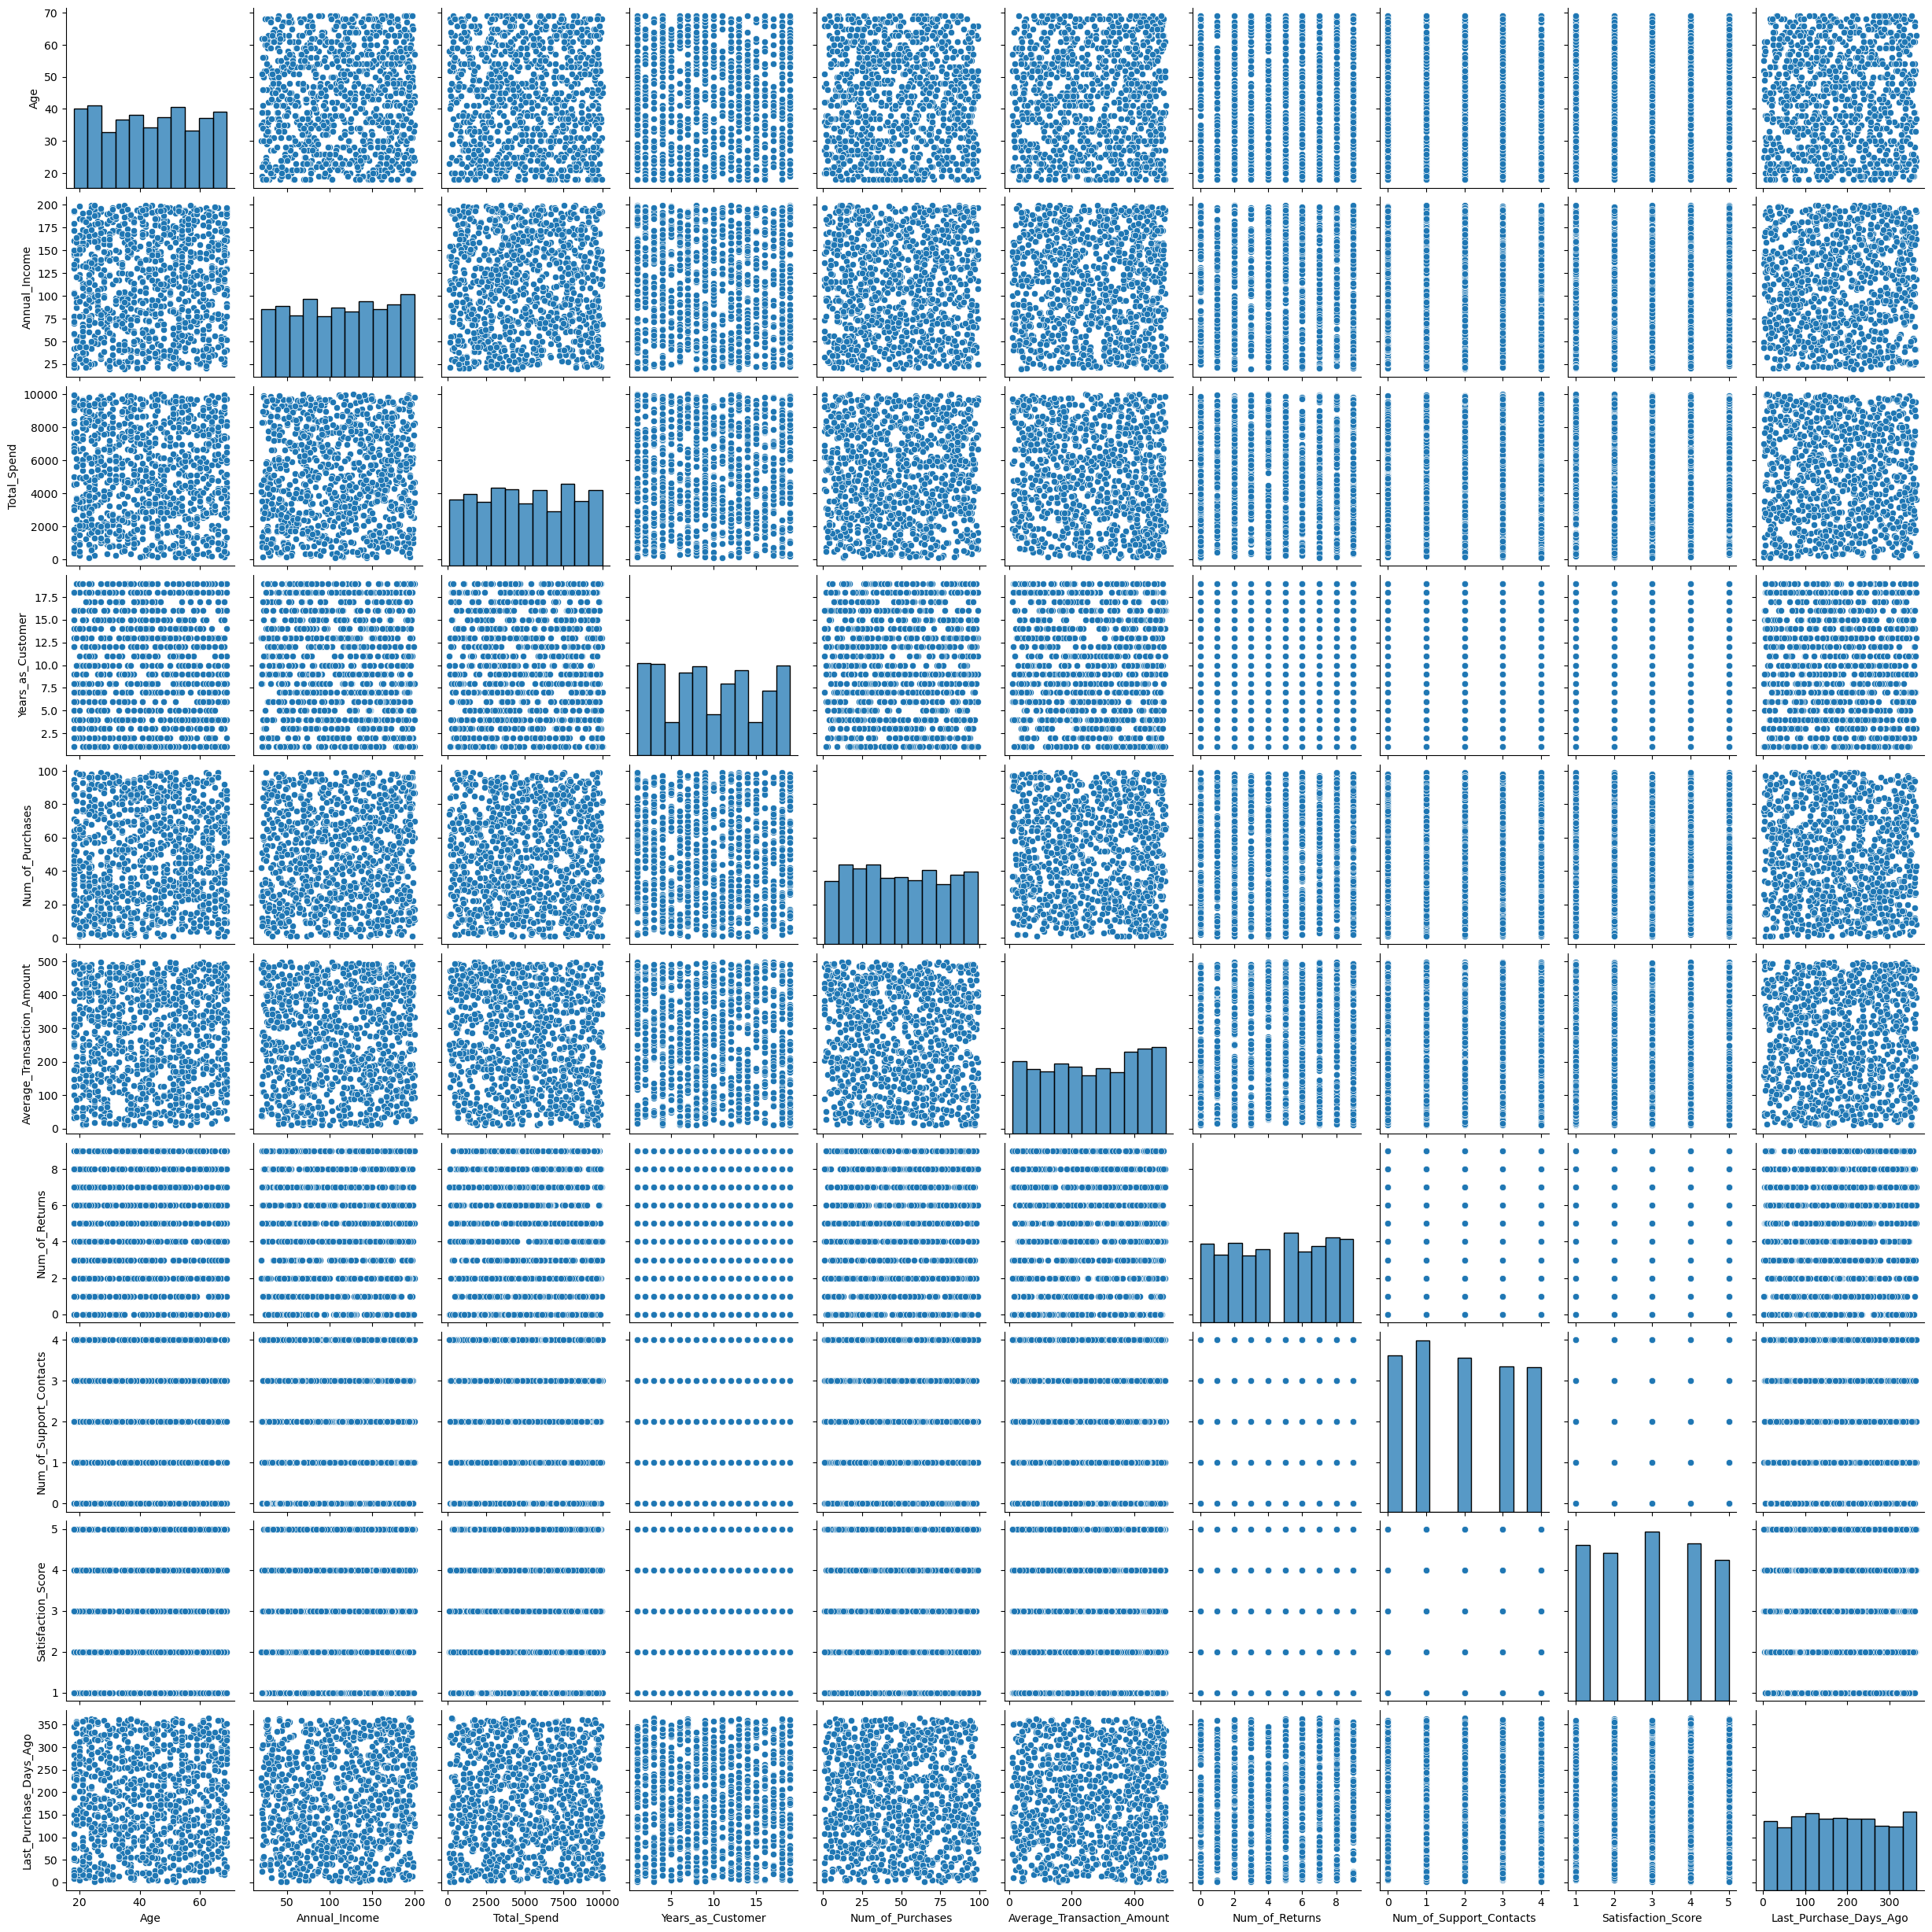

In [17]:
# pair plot
sns.pairplot(df[numerical_columns])
plt.show()
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

In [18]:
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Check data types after conversion
print(df.dtypes)

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object


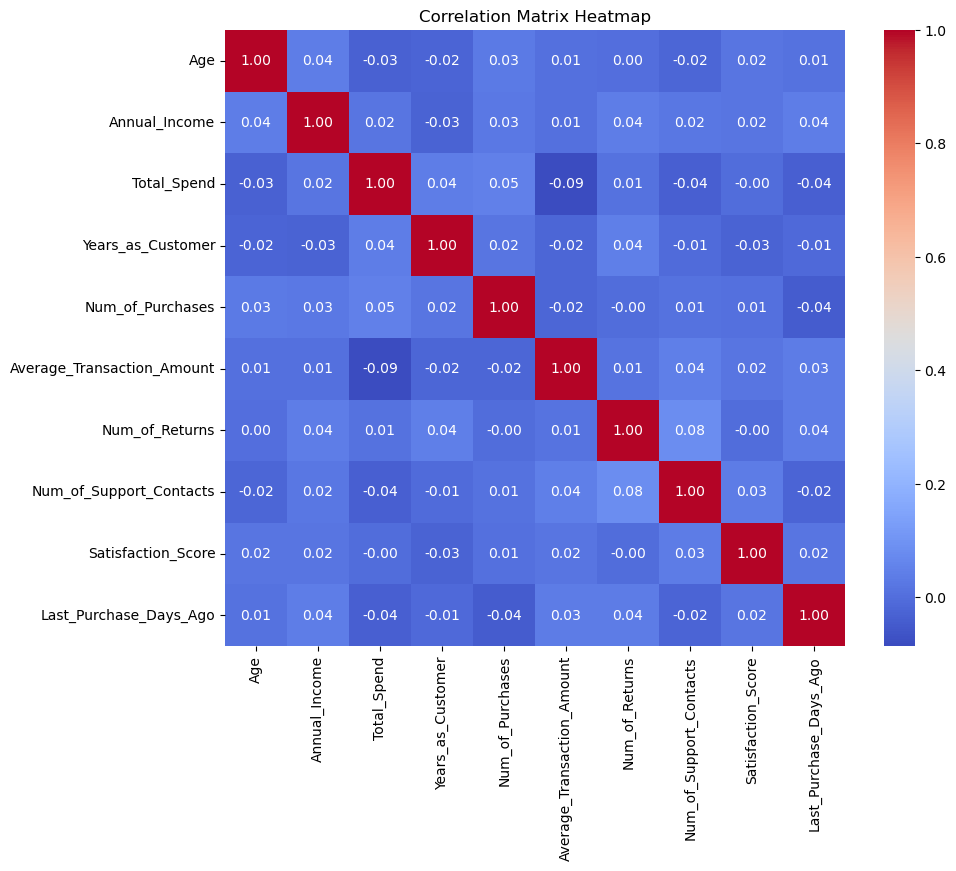

In [19]:
# Create correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

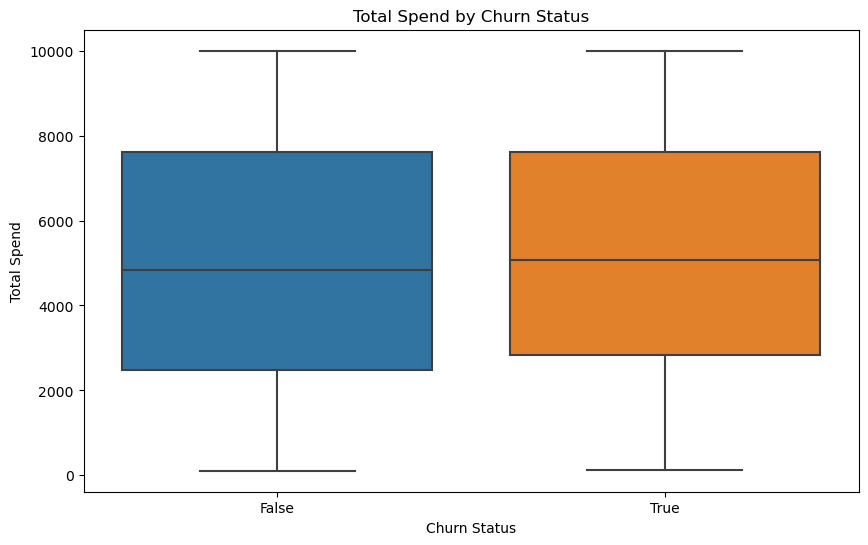

In [20]:
# Boxplot of Total_Spend by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target_Churn', y='Total_Spend', data=df)
plt.title('Total Spend by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Spend')
plt.show()

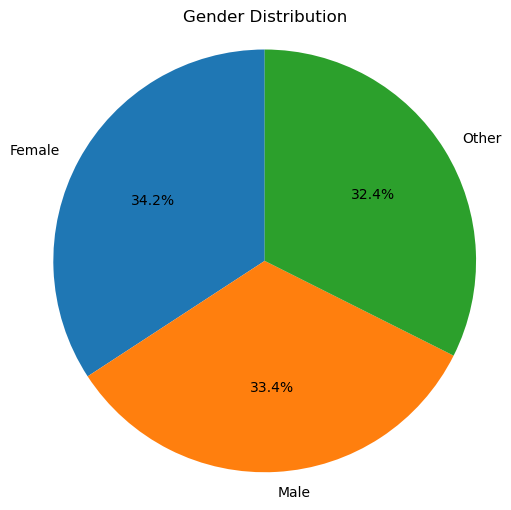

In [21]:
# Pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

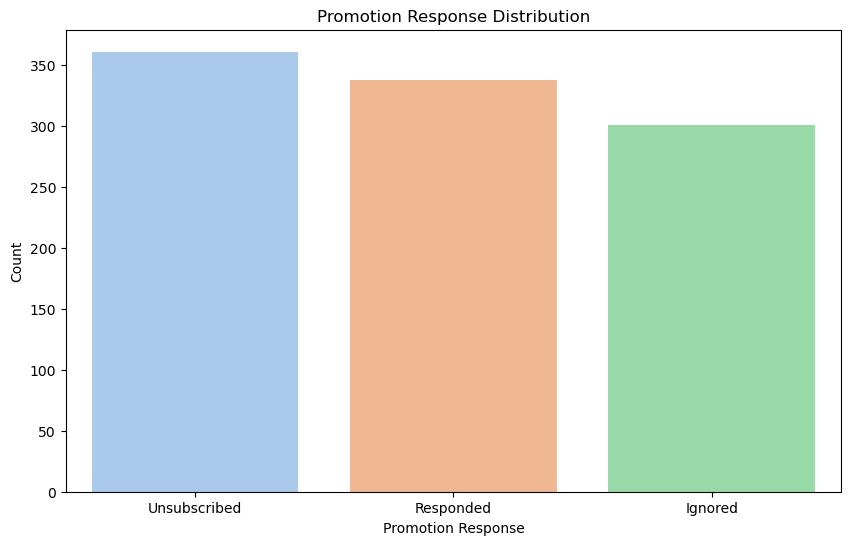

In [22]:
# Bar graph for promotion response distribution
pro_res_counts = df['Promotion_Response'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = pro_res_counts.index, y = pro_res_counts.values, palette='pastel')
plt.title('Promotion Response Distribution')
plt.xlabel('Promotion Response')
plt.ylabel('Count')
plt.show()

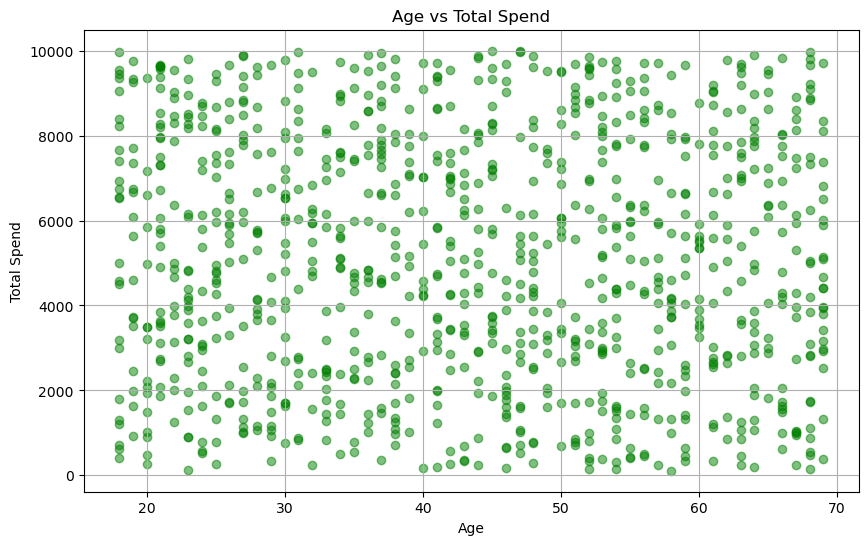

In [23]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Total_Spend'], color='green', alpha=0.5)
plt.title('Age vs Total Spend')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

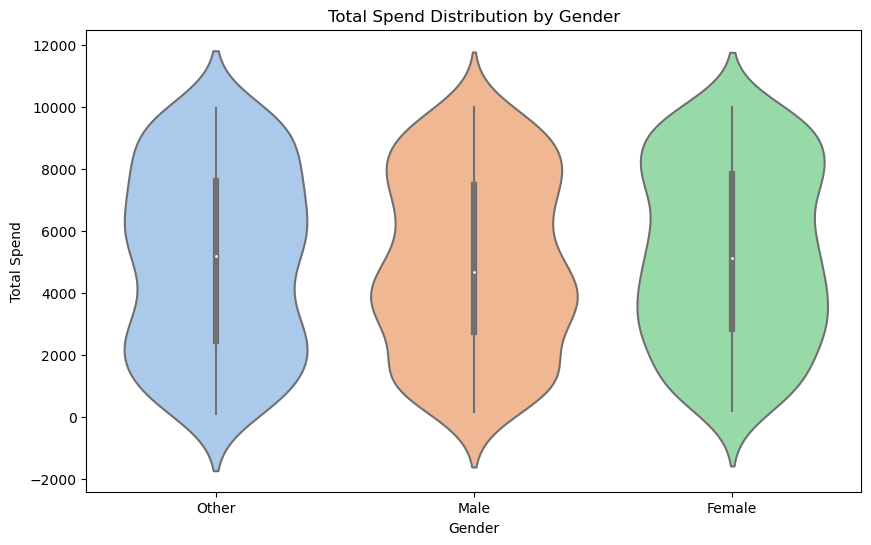

In [24]:
# Violin plot 
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Total_Spend', data=df, palette='pastel')
plt.title('Total Spend Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.show()